Developed in \-
<br>
     **Python: 3.9
     <br>
     SDK: Qiskit**
<br>    
Qiskit is an open source SDK for working with IBM Quantum processor. You can use it locally by consuming multiple APIs provided by [Qiskit](https://qiskit.org/documentation/getting_started.html) or you can also run it on [IBM Quantum Cloud](https://quantum-computing.ibm.com/).

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

## Background

The Toffoli gate, also known as CCNOT gate is a universal reversible logic gate, i.e. any classical reversible gate can be constructed from Toffoli gate. It was invented by Tommaso Toffoli. It is used in circuit synthesis of reversible arithmetic operators. More detailed information on this gate and it's corollaries can be found [here](https://arxiv.org/abs/0803.2316)

## Construction of Toffoli Gate

A gate is said to be universal if it satisfies the condtion where for any input, there is always a unique output. For example, NOT gate is reversible as there is a unique output from every input and this output can be traced back to the input.

| Input | Output |
| --- | --- |
| 0 | 1 |
| 1 | 0 |

Similarly, Toffoli gate is a reversible gate as every output has a unique input mapped to it.

| Input | Output |
| --- | --- |
| 000 | 000 |
| 001 | 001 |
| 010 | 010 |
| 011 | 011 |
| 100 | 100 |
| 101 | 101 |
| 110 | 111 |
| 111 | 110 |

Matrix representation of Toffoli gate -

$$
\begin {bmatrix} 
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

Toffoli gate has a complicated physical implementation. It is contructed using multiple single qubit gates and atleast 6 CNOT gates. One of the constructions is as follows.

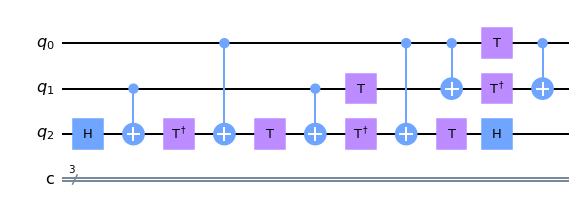

In [49]:
from qiskit import QuantumCircuit

quantum_circuit = QuantumCircuit(3)

quantum_circuit.h(2)
quantum_circuit.cx(1,2)
quantum_circuit.tdg(2)
quantum_circuit.cx(0,2)
quantum_circuit.t(2)
quantum_circuit.cx(1,2)
quantum_circuit.tdg(2)
quantum_circuit.cx(0,2)
quantum_circuit.t(1)
quantum_circuit.t(2)
quantum_circuit.cx(0,1)
quantum_circuit.h(2)
quantum_circuit.t(0)
quantum_circuit.tdg(1)
quantum_circuit.cx(0,1)

ToffoliGate =  quantum_circuit.to_instruction()

circuit = QuantumCircuit(3,3)
circuit.append(ToffoliGate, [0,1,2])
circ = circuit.decompose()
circ.draw('mpl')

## Verifying the circuit

### Case - Input 000

When input is '000', output should be unchanged '000'

c:\users\aditi\anaconda3\envs\quantum\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


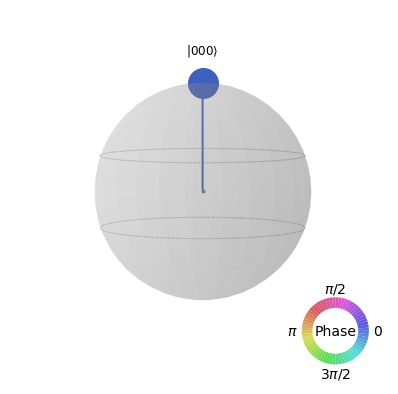

In [50]:
from qiskit.visualization import plot_state_qsphere, plot_bloch_vector, plot_bloch_multivector, plot_histogram
from qiskit import BasicAer, transpile

sv_backend = BasicAer.get_backend('statevector_simulator')
qasm_backend = BasicAer.get_backend('qasm_simulator')

result = sv_backend.run(transpile(circ, sv_backend)).result()
psi  = result.get_statevector(circ)

plot_state_qsphere(psi)

c:\users\aditi\anaconda3\envs\quantum\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


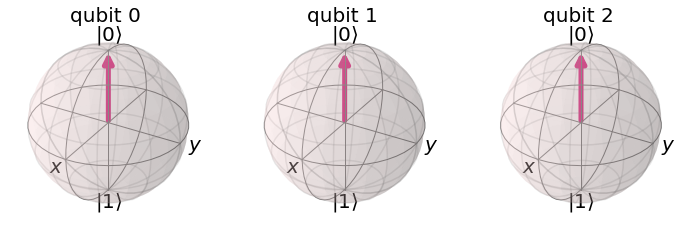

In [51]:
plot_bloch_multivector(psi)

No measurements in circuit "circuit-1007", classical register will remain all zeros.


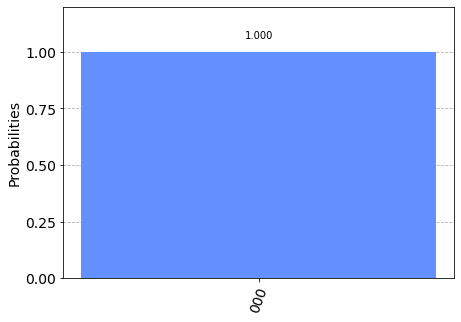

In [52]:
result = qasm_backend.run(transpile(circ, qasm_backend)).result()
counts  = result.get_counts(circ)

plot_histogram(counts)

### Case -  Input 110

When input is '110', third qubit is flipped and output changes to '111'

c:\users\aditi\anaconda3\envs\quantum\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


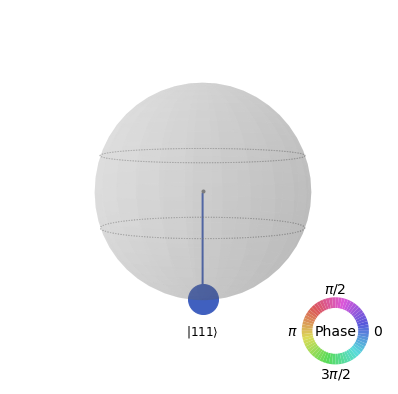

In [53]:
circuit_110 = QuantumCircuit(3,3)
circuit_110.x(0)
circuit_110.x(1)
circuit_110.append(ToffoliGate, [0,1,2])
circ_110 = circuit_110.decompose()
circ_110.draw('mpl')

result_110 = sv_backend.run(transpile(circ_110, sv_backend)).result()
psi_110  = result_110.get_statevector(circ_110)

plot_state_qsphere(psi_110)

### Case - Input 100

When input is '100', output is unchanged '100'

c:\users\aditi\anaconda3\envs\quantum\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


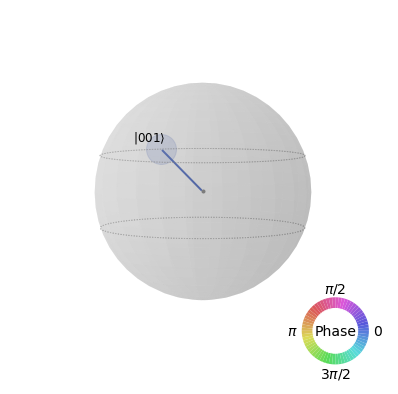

In [54]:
circuit_100 = QuantumCircuit(3,3)
circuit_100.x(0)
circuit_100.append(ToffoliGate, [0,1,2])
circ_100 = circuit_100.decompose()
circ_100.draw('mpl')

result_100 = sv_backend.run(transpile(circ_100, sv_backend)).result()
psi_100  = result_100.get_statevector(circ_100)

plot_state_qsphere(psi_100)

c:\users\aditi\anaconda3\envs\quantum\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


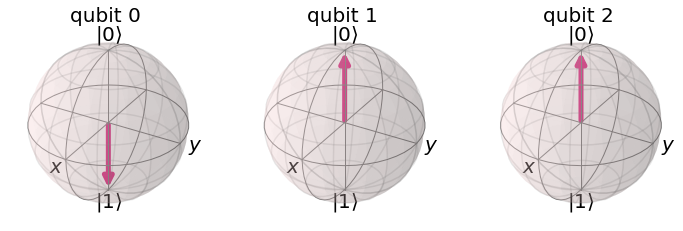

In [55]:
plot_bloch_multivector(psi_100)

### Case -  Input 111

When input is '111', third qubit is flipped and output changes to '110'

c:\users\aditi\anaconda3\envs\quantum\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


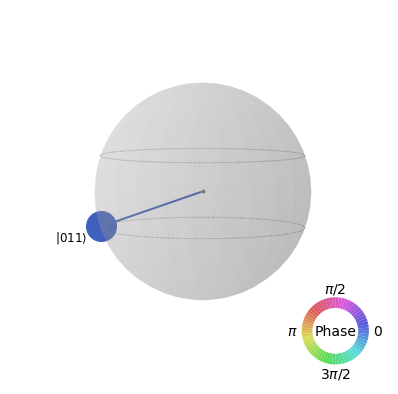

In [56]:
circuit_111 = QuantumCircuit(3,3)
circuit_111.x(0)
circuit_111.x(1)
circuit_111.x(2)
circuit_111.append(ToffoliGate, [0,1,2])
circ_111 = circuit_111.decompose()
circ_111.draw('mpl')

result_111 = sv_backend.run(transpile(circ_111, sv_backend)).result()
psi_111  = result_111.get_statevector(circ_111)

plot_state_qsphere(psi_111)

c:\users\aditi\anaconda3\envs\quantum\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


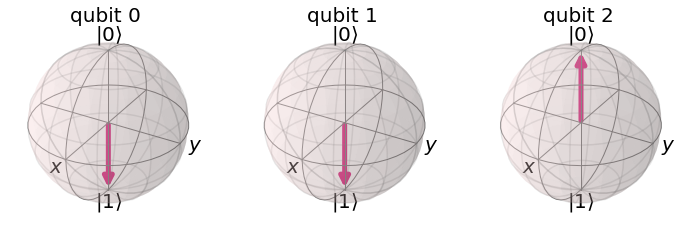

In [57]:
plot_bloch_multivector(circ_111)

Author : **[Aditi Rupade](https://aditirupade.github.io/)**